In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c
import sys, getopt
import time
from joblib import Parallel, delayed
sys.path.append('/Users/gfarinas/kameleon/lib/python2.7/site-packages/ccmc/')
import _CCMC as ccmc
def topology(variable,x,y,z):
    #calculate topology
    L=3.5
    seed_pts = x.size
    topology_var = np.zeros(seed_pts)
    count=0
    for i in range(seed_pts):
        fieldline = tracer.bidirectionalTrace('b',x[i],y[i],z[i])
        npts=fieldline.size()
        p_init=fieldline.getPosition(0)
        p_end=fieldline.getPosition(npts-1)
        init_in = (abs(p_init.component1) < L) and (abs(p_init.component2) < L) and (abs(p_init.component3) < L)
        end_in = (abs(p_end.component1) < L) and (abs(p_end.component2) < L) and (abs(p_end.component3) < L)

        if init_in and end_in:
            topology_var[i] = 0 # 0 means closed B line       
        elif init_in or end_in:       
            if (init_in):
                if p_init.component3 < 0:
                    topology_var[i] = 1   # 1 means south B line
                else:
                    topology_var[i] = 2   # 2 means north B line  
            elif (end_in):
                if p_end.component3 < 0:               
                    topology_var[i] = 1  # 1 means south B line               
                else:
                    topology_var[i] = 2  # 2 means north B line
        else:       
            topology_var[i] = 3      # 3 means IMF fieldline
        if i%500==0:
            print (count,seed_pts)
        count=count+1
    print topology_var 
    return topology_var

In [2]:
def topology_parallel(variable,x,y,z):
    Npoints = x.size
    Npar=8
    Ncol, Rem= divmod(Npoints, Npar)
    N = Npar*Ncol
    x_par = np.zeros((Npar,Ncol))
    print x_par.shape
    y_par = np.zeros((Npar,Ncol))
    z_par = np.zeros((Npar,Ncol))
    top_var = np.zeros((Npar,Ncol))
    for i in range(Npar):
        print i
        x_par[i,:]=x[i*Ncol:(i+1)*Ncol]
        y_par[i,:]=y[i*Ncol:(i+1)*Ncol]
        z_par[i,:]=z[i*Ncol:(i+1)*Ncol]
#    for i in range(0,Npar-1):
#        top_var[i,:]=topology('b',x_par[i,:],y_par[i,:],z_par[i,:])
    top=Parallel(n_jobs=Npar)(delayed(topology)('b',x_par[i,:],y_par[i,:],z_par[i,:]) for i in range(Npar))
    top_var1 = np.reshape(top,N)
    print "top_var1 shape is:"
    print top_var1.shape
#   Calculate topology of rem points
    top_var2 = np.zeros(Rem)
    top_var2=topology('b',x[N:N+Rem],y[N:N+Rem],z[N:N+Rem])
#    print "top_var2 shape is:"
#    print top_var2.shape
    top_var = np.concatenate([top_var1,top_var2])
    return top_var      
            
        

In [3]:
# input parameters for topology function, filename and seed position
filename=['./3d__ful_1_t00003900_n0090324.out.cdf',
            './3d__ful_1_t00003915_n0091036.out.cdf',
            './3d__ful_1_t00003930_n0091754.out.cdf',
            './3d__ful_1_t00003945_n0092484.out.cdf',
            './3d__ful_1_t00004000_n0093228.out.cdf',
            './3d__ful_1_t00004030_n0094786.out.cdf',
            './3d__ful_1_t00004045_n0095587.out.cdf',
            './3d__ful_1_t00004100_n0096399.out.cdf',
            './3d__ful_1_t00004115_n0097224.out.cdf',
            './3d__ful_1_t00004130_n0098054.out.cdf',
            './3d__ful_1_t00004145_n0098886.out.cdf',
            './3d__ful_1_t00004200_n0099729.out.cdf',
            './3d__ful_1_t00004215_n0100579.out.cdf',
            './3d__ful_1_t00004230_n0101428.out.cdf',
            './3d__ful_1_t00004245_n0102272.out.cdf',
            './3d__ful_1_t00004300_n0103144.out.cdf']
top_l=[]
xv_l = []
zv_l = []

#first pict
xmin = 8.0;xmax = 9.25;
zmin = -1;zmax = 3;
dx=.005; dy=.01; dz=.01;
#dx=.005; dy=.01; dz=.02;
xv,zv = np.mgrid[xmin:xmax:dx,zmin:zmax:dz]
xvv = np.reshape(xv,[np.product(xv.shape)])
yvv = 0*np.ones(np.product(xv.shape))
zvv = np.reshape(zv,[np.product(zv.shape)])
#print xv.shape
#print zv.shape
kameleon = ccmc.Kameleon()    
kameleon.open(filename[2])
kameleon.loadVariable("b")
tracer = ccmc.Tracer(kameleon)
tracer.setMaxIterations(10000)
tracer.setDn(1.)
top=topology_parallel('b',xvv,yvv,zvv)
xv_1=xv
zv_1=zv
top_1=top

(8, 12500)
0
1
2
3
4
5
6
7
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(1000, 12500)
(1500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(2000, 12500)
(2000, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(2500, 12500)
(1500, 12500)
(1500, 12500)
(2500, 12500)
(2500, 12500)
(3000, 12500)
(2000, 12500)
(2000, 12500)
(3000, 12500)
(2000, 12500)
(2000, 12500)
(2000, 12500)
(3500, 12500)
(3000, 12500)
(3500, 12500)
(2500, 12500)
(2500, 12500)
(2500, 12500)
(4000, 12500)
(2500, 12500)
(2500, 12500)
(3500, 12500)
(4000, 12500)
(3000, 12500)
(4500, 12500)
(3000, 12500)
(3000, 12500)
(4500, 12500)
(4000, 12500)
(3000, 12500)
(5000, 12500)
(3000, 12500)
(3500, 12500)
(5000, 12500)
(3500, 12500)
(4500, 12500)
(5500, 12500)
(3500, 12500)
(3500, 1250

In [4]:
#second pict
xmin = 8.0;xmax = 9.25;
zmin = -1;zmax = 3;
dx=.005; dy=.01; dz=.01;
#dx=.005; dy=.01; dz=.02;
xv,zv = np.mgrid[xmin:xmax:dx,zmin:zmax:dz]
xvv = np.reshape(xv,[np.product(xv.shape)])
yvv = 0*np.ones(np.product(xv.shape))
zvv = np.reshape(zv,[np.product(zv.shape)])
#print xv.shape
#print zv.shape
kameleon = ccmc.Kameleon()    
kameleon.open(filename[4])
kameleon.loadVariable("b")
tracer = ccmc.Tracer(kameleon)
tracer.setMaxIterations(10000)
tracer.setDn(1.)
top=topology_parallel('b',xvv,yvv,zvv)
xv_2=xv
zv_2=zv
top_2=top


(8, 12500)
0
1
2
3
4
5
6
7
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(1500, 12500)
(1500, 12500)
(1500, 12500)
(2500, 12500)
(2000, 12500)
(2500, 12500)
(2000, 12500)
(2000, 12500)
(3000, 12500)
(2500, 12500)
(2000, 12500)
(2000, 12500)
(2000, 12500)
(3000, 12500)
(3500, 12500)
(2500, 12500)
(2500, 12500)
(3000, 12500)
(3500, 12500)
(2500, 12500)
(2500, 12500)
(2500, 12500)
(4000, 12500)
(3000, 12500)
(4000, 12500)
(3500, 12500)
(3000, 12500)
(4500, 12500)
(3000, 12500)
(3000, 12500)
(3000, 12500)
(4500, 12500)
(3500, 12500)
(5000, 12500)
(4000, 12500)
(3500, 12500)
(3500, 12500)
(5000, 12500)
(5500, 12500)
(3500, 12500)
(3500, 1250

In [5]:
#third pict
xmin = 8.0;xmax = 9.25;
zmin = -1;zmax = 3;
dx=.005; dy=.01; dz=.01;
#dx=.005; dy=.01; dz=.02;
xv,zv = np.mgrid[xmin:xmax:dx,zmin:zmax:dz]
xvv = np.reshape(xv,[np.product(xv.shape)])
yvv = -0*np.ones(np.product(xv.shape))
zvv = np.reshape(zv,[np.product(zv.shape)])
#print xv.shape
#print zv.shape
kameleon = ccmc.Kameleon()    
kameleon.open(filename[7])
kameleon.loadVariable("b")
tracer = ccmc.Tracer(kameleon)
tracer.setMaxIterations(10000)
tracer.setDn(1.)
top=topology_parallel('b',xvv,yvv,zvv)
xv_3=xv
zv_3=zv
top_3=top


(8, 12500)
0
1
2
3
4
5
6
7
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(1500, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(2500, 12500)
(2500, 12500)
(2000, 12500)
(2000, 12500)
(2500, 12500)
(2000, 12500)
(2000, 12500)
(2000, 12500)
(3000, 12500)
(3000, 12500)
(2500, 12500)
(2500, 12500)
(3000, 12500)
(3500, 12500)
(2500, 12500)
(2500, 12500)
(2500, 12500)
(3500, 12500)
(3000, 12500)
(3500, 12500)
(4000, 12500)
(3000, 12500)
(4000, 12500)
(3000, 12500)
(3000, 12500)
(3000, 12500)
(4500, 12500)
(4000, 12500)
(3500, 12500)
(4500, 12500)
(3500, 12500)
(5000, 12500)
(3500, 12500)
(3500, 12500)
(3500, 12500)
(4500, 12500)
(5000, 1250

In [6]:
#4 pict
xmin = 8.0;xmax = 9.25;
zmin = -1;zmax = 3;
dx=.005; dy=.01; dz=.01;
#dx=.005; dy=.01; dz=.02;
xv,zv = np.mgrid[xmin:xmax:dx,zmin:zmax:dz]
xvv = np.reshape(xv,[np.product(xv.shape)])
yvv = -0*np.ones(np.product(xv.shape))
zvv = np.reshape(zv,[np.product(zv.shape)])
#print xv.shape
#print zv.shape
kameleon = ccmc.Kameleon()    
kameleon.open(filename[13])
kameleon.loadVariable("b")
tracer = ccmc.Tracer(kameleon)
tracer.setMaxIterations(10000)
tracer.setDn(1.)
top=topology_parallel('b',xvv,yvv,zvv)
xv_4=xv
zv_4=zv
top_4=top

kameleon.close()

(8, 12500)
0
1
2
3
4
5
6
7
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(0, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(1000, 12500)
(1000, 12500)
(1000, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(1500, 12500)
(1500, 12500)
(2000, 12500)
(2500, 12500)
(2000, 12500)
(2500, 12500)
(2000, 12500)
(2000, 12500)
(3000, 12500)
(2000, 12500)
(2500, 12500)
(2000, 12500)
(3000, 12500)
(2500, 12500)
(3500, 12500)
(2500, 12500)
(2500, 12500)
(3000, 12500)
(2500, 12500)
(3500, 12500)
(2500, 12500)
(4000, 12500)
(3000, 12500)
(3500, 12500)
(3000, 12500)
(3000, 12500)
(4000, 12500)
(4500, 12500)
(3000, 12500)
(3500, 12500)
(3000, 12500)
(4000, 12500)
(5000, 12500)
(4500, 12500)
(3500, 12500)
(3500, 12500)
(3500, 12500)
(4000, 12500)
(5500, 12500)
(3500, 1250

0L

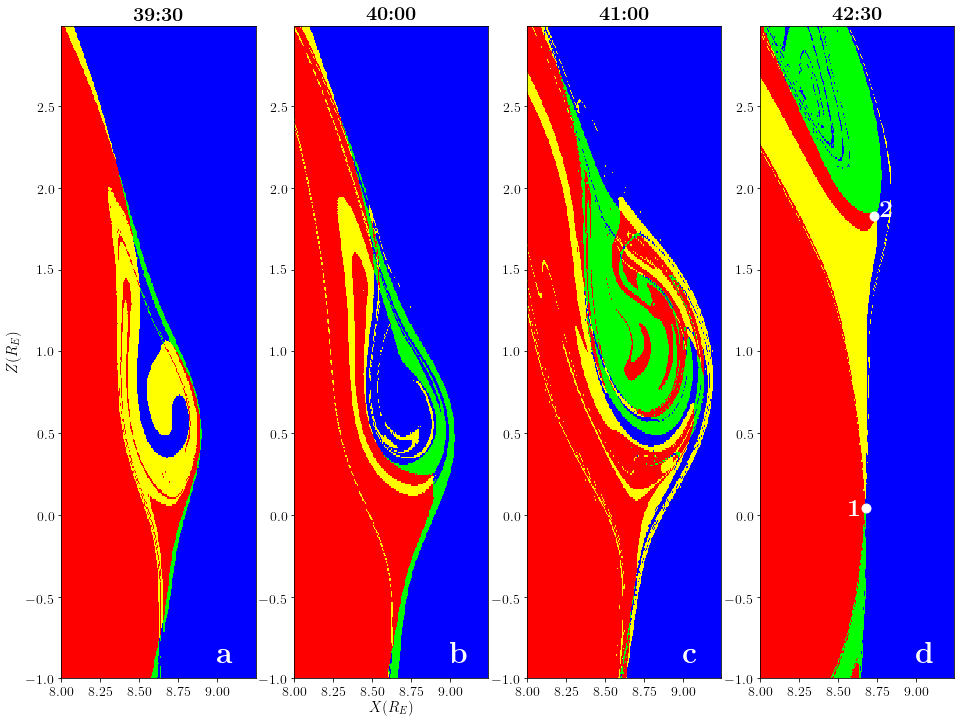

In [7]:
topology_var_v =[]
topology_var_v.append(np.reshape(top_1,xv_1.shape))
topology_var_v.append(np.reshape(top_2,xv_2.shape))
topology_var_v.append(np.reshape(top_3,xv_3.shape))
topology_var_v.append(np.reshape(top_4,xv_4.shape))
#print topology_var_v
#print xv
#print zv
# Magic function to make matplotlib inline
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#colors=[[1, 0, 0],[0, 1, 0],[1, 1, 0],[0, 0, 1]] #red closed, green south connected, yellow north connected, blue IMF
cMap = c.ListedColormap([[1, 0, 0],[0, 1, 0],[1, 1, 0],[0, 0, 1]])
fig, ax = plt.subplots(1,4,figsize=(16, 12))
p = ax[0].pcolormesh(xv_1, zv_1, topology_var_v[0],cmap=cMap)
ax[0].set(xlabel=r'', ylabel=r'$Z(R_E)$',title=r'\textibf{39:30}')
ax[0].set_ylabel(r'$Z(R_E)$', fontsize=15)
ax[0].set_title(r'\textbf{39:30}',fontsize=20)
#ax[0].set_xlabel(r'$X(R_E)$', fontsize=15)
p = ax[1].pcolormesh(xv_2, zv_2, topology_var_v[1],cmap=cMap)
ax[1].set(xlabel=r'$X(R_E)$', ylabel='',title=r'\textbf{40:00}')
ax[1].set_title(r'\textbf{40:00}',fontsize=20)
ax[1].set_xlabel(r'$X(R_E)$', fontsize=15)
p = ax[2].pcolormesh(xv_3, zv_3, topology_var_v[2],cmap=cMap)
ax[2].set(xlabel=r'', ylabel='',title=r'\textbf{41:00}')
ax[2].set_title(r'\textbf{41:00}',fontsize=20)
#ax[2].set_xlabel(r'$X(R_E)$', fontsize=15)
p = ax[3].pcolormesh(xv_4, zv_4, topology_var_v[3],cmap=cMap)
ax[3].set(xlabel=r'', ylabel='',title=r'\textbf{42:30}')
ax[3].set_title(r'\textbf{42:30}',fontsize=20)

for tick in ax[0].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[1].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[1].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[2].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[2].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[3].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[3].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
ax[0].text(9.0, -0.9, r'\textbf{a}', fontsize=30, color='w')
ax[1].text(9.0, -0.9, r'\textbf{b}', fontsize=30, color='w')
ax[2].text(9.0, -0.9, r'\textbf{c}', fontsize=30, color='w')
ax[3].text(9.0, -0.9, r'\textbf{d}', fontsize=30, color='w')
ax[3].scatter([8.73], [1.83],color='w',s=80)
ax[3].text(8.77, 1.83, r'\textbf{2}', fontsize=25, color='w')
ax[3].scatter([8.68], [0.04],color='w',s=80)
ax[3].text(8.57, 0, r'\textbf{1}', fontsize=25, color='w')
fig.savefig("test.png", dpi = 300)

In [8]:
print np.max((xv))

9.245


In [9]:
xv_l

[]